In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from collections import Counter
import numpy as np
import networkx as nx
from itertools import combinations

#ETL

In [2]:
df = pd.read_csv('/content/Project khiếu nại.csv')

In [3]:
df['Received date'] = pd.to_datetime(df['Received date'])
df['Closed date'] = pd.to_datetime(df['Closed date'])
df['processing_time'] = (df['Closed date'] - df['Received date']).dt.days

In [4]:
df['Others involved'] = df['Others involved'].fillna('No')

In [5]:
df['Complaint filed against'] = df['Complaint filed against'].fillna('Unknown').replace('', 'Unknown')
df['Complaint filed by'] = df['Complaint filed by'].fillna('Unknown').replace('', 'Unknown')
df['Confirmed complaint'] = df['Confirmed complaint'].fillna('Unknown').replace('', 'Unknown')
df['How resolved'] = df['How resolved'].fillna('Unknown').replace('', 'Unknown')

In [6]:
df['Reason complaint filed'] = df['Reason complaint filed'].fillna('Unknown').replace('', 'Unknown')
df['Coverage type'] = df['Coverage type'].fillna('Unknown').replace('', 'Unknown')
df['Coverage level'] = df['Coverage level'].fillna('Unknown').replace('', 'Unknown')
df['Complaint type'] = df['Complaint type'].fillna('Unknown').replace('', 'Unknown')
df['Respondent Role'] = df['Respondent Role'].fillna('Unknown').replace('', 'Unknown')
df['Complainant type'] = df['Complainant type'].fillna('Unknown').replace('', 'Unknown')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268389 entries, 0 to 268388
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Complaint number         268389 non-null  int64         
 1   Complaint filed against  268389 non-null  object        
 2   Complaint filed by       268389 non-null  object        
 3   Reason complaint filed   268389 non-null  object        
 4   Confirmed complaint      268389 non-null  object        
 5   How resolved             268389 non-null  object        
 6   Received date            268389 non-null  datetime64[ns]
 7   Closed date              268389 non-null  datetime64[ns]
 8   Complaint type           268389 non-null  object        
 9   Coverage type            268389 non-null  object        
 10  Coverage level           268389 non-null  object        
 11  Others involved          268389 non-null  object        
 12  Respondent ID   

In [8]:
df.head(10)

,Complaint number,Complaint filed against,Complaint filed by,Reason complaint filed,Confirmed complaint,How resolved,Received date,Closed date,Complaint type,Coverage type,Coverage level,Others involved,Respondent ID,Respondent Role,Respondent type,Complainant type,Keywords,processing_time
0,1,METROPOLITAN LIFE INSURANCE COMPANY,Relative,Cust Service Claim Handling,No,Other,2012-06-12,2012-07-25,"Life, Accident and Health",Life & Annuity,Individual Life,No,13191,Ins Co - Licensed/Active,Organization,INDV,NaN,43
1,2,AETNA LIFE INSURANCE COMPANY,Provider,Delays (Claims Handling),No,Information Furnished,2012-06-21,2012-08-01,"Life, Accident and Health",Accident and Health,Group A&H,Insured,245,Ins Co - Licensed/Active,Organization,ORG,NaN,41
2,3,"BLUE CROSS AND BLUE SHIELD OF TEXAS, A DIVISIO...",Provider,Denial Of Claim,No,Other,2012-06-11,2012-07-30,"Life, Accident and Health",Accident and Health,Group A&H,No,10047,Ins Co - Licensed/Active,Organization,ORG,NaN,49
3,4,"BLUE CROSS AND BLUE SHIELD OF TEXAS, A DIVISIO...",Provider,Denial Of Claim,No,Other,2012-06-28,2012-07-30,"Life, Accident and Health",Accident and Health,Group A&H,No,10047,Ins Co - Licensed/Active,Organization,ORG,NaN,32
4,5,"CHARTER OAK FIRE INSURANCE COMPANY, THE",Insured,Unsatisfactory Settle/Offer,No,Contract Language/Legal Issue; Question of Fact,2012-06-13,2012-07-17,Property and Casualty,Automobile,Individual Private Pass,No,2918,Ins Co - Licensed/Active,Organization,INDV,2012 NORTH TEXAS TORNADOES; ADJUSTER'S HANDLIN...,34
5,6,REASSURE AMERICA LIFE INSURANCE COMPANY,Insured,Cash Value; Misrepresentation,No,No Jurisdiction,2012-06-18,2012-07-30,"Life, Accident and Health",Life & Annuity,Individual Life,No,1228,Ins Co - Licensed/Active,Organization,INDV,NaN,42
6,7,USAA GENERAL INDEMNITY COMPANY,Third Party,Unsatisfactory Settle/Offer,No,Claim Settled; Question of Fact,2012-02-27,2012-07-02,Property and Casualty,Automobile,Individual Private Pass,Insured,1276,Ins Co - Licensed/Active,Organization,INDV,CLAIM EVALUATION,126
7,8,"BLUE CROSS AND BLUE SHIELD OF TEXAS, A DIVISIO...",Insured,Denial Of Claim,No,Company Position Upheld,2012-06-19,2012-08-06,"Life, Accident and Health",Accident and Health,Group A&H,No,10047,Ins Co - Licensed/Active,Organization,INDV,NaN,48
8,9,PROPERTY AND CASUALTY INSURANCE COMPANY OF HAR...,Insured,Unsatisfactory Settle/Offer,No,Complainant Retained Attorney; Question of Fac...,2011-10-03,2012-07-20,Property and Casualty,Homeowners,Homeowners,No,8123,Ins Co - Licensed/Active,Organization,INDV,CLAIM EVALUATION; SUPPLEMENTARY PAYMENT,291
9,9,AMERICAS SERVICING CORPORATION,Insured,Unsatisfactory Settle/Offer,Yes,Failure to Timely Respond,2011-10-03,2012-07-20,Property and Casualty,Homeowners,Homeowners,No,66259,Mortgage Lender,Organization,INDV,CLAIM EVALUATION; SUPPLEMENTARY PAYMENT,291


In [9]:
df.describe()

,Complaint number,Received date,Closed date,Respondent ID,processing_time
count,268389.000000,268389,268389,2.683890e+05,268389.000000
mean,208134.916744,2018-06-17 16:24:43.732939520,2018-09-28 14:03:39.147580416,5.128279e+04,102.902030
min,1.000000,2011-04-28 00:00:00,2012-05-21 00:00:00,2.500000e+01,0.000000
25%,102345.000000,2015-07-15 00:00:00,2015-10-09 00:00:00,1.348000e+03,36.000000
50%,206496.000000,2018-02-27 00:00:00,2018-11-06 00:00:00,2.737000e+03,71.000000
75%,316884.000000,2021-07-19 00:00:00,2021-08-06 00:00:00,1.019800e+04,120.000000
max,421460.000000,2025-04-17 00:00:00,2025-04-21 00:00:00,3.046275e+06,1067.000000
std,121428.040498,NaN,NaN,2.314973e+05,109.739061


In [10]:
df.isna().sum()

,0
Complaint number,0
Complaint filed against,0
Complaint filed by,0
Reason complaint filed,0
Confirmed complaint,0
How resolved,0
Received date,0
Closed date,0
Complaint type,0
Coverage type,0


#1. Phân tích chất lượng khiếu nại

##1. Tỷ lệ khiếu nại được xác nhận theo vai trò người bị khiếu nại

In [11]:
pd.crosstab(df['Respondent Role'], df['Confirmed complaint'], normalize='index') * 100

Confirmed complaint,No,Unknown,Yes
Respondent Role,,,
Agent,64.914001,0.000000,35.085999
Attorney,86.666667,0.000000,13.333333
Claimant / Insured,71.428571,0.000000,28.571429
Claimant Representative,100.000000,0.000000,0.000000
Claims Adjuster,71.367521,0.000000,28.632479
Continuing Care Retiremt Comm,100.000000,0.000000,0.000000
Continuing Education Provider,0.000000,0.000000,100.000000
DWC HCP Designated Doctor,100.000000,0.000000,0.000000
DWC HCP Facility,100.000000,0.000000,0.000000


##2. Theo loại người khiếu nại

In [12]:
df['Complaint type'] = df['Complaint type'].astype(str).str.strip()
complaint_ct = pd.crosstab(df['Complaint type'], df['Confirmed complaint'], normalize='index') * 100

##3. Theo lý do khiếu nại

In [13]:
pd.crosstab(df['Reason complaint filed'], df['Confirmed complaint'], normalize='index') * 100

Confirmed complaint,No,Unknown,Yes
Reason complaint filed,,,
Accelerated Benefits; Cancellation; Delays (Policyholder Service),0.000000,0.0,100.000000
Accelerated Benefits; Cash Value; Delays (Policyholder Service); Misrepresentation; Premium Notice,100.000000,0.0,0.000000
Accelerated Benefits; Cust Service Claim Handling; Delays (Claims Handling),100.000000,0.0,0.000000
Accelerated Benefits; Delays (Policyholder Service),100.000000,0.0,0.000000
Accelerated Benefits; Denial Of Claim,100.000000,0.0,0.000000
...,...,...,...
XX-Othr Violatn of Ins Law/Reg,66.666667,0.0,33.333333
XX-Payment Not Credited,50.000000,0.0,50.000000
XX-State Specific,100.000000,0.0,0.000000


## Biểu đồ cho 1,2,3

In [14]:
print("Tổng số khiếu nại:", df.shape[0])
print("Số cột:", df.shape[1])
print("\nThông tin chung:")
print(df.info())

Tổng số khiếu nại: 268389
Số cột: 18

Thông tin chung:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268389 entries, 0 to 268388
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Complaint number         268389 non-null  int64         
 1   Complaint filed against  268389 non-null  object        
 2   Complaint filed by       268389 non-null  object        
 3   Reason complaint filed   268389 non-null  object        
 4   Confirmed complaint      268389 non-null  object        
 5   How resolved             268389 non-null  object        
 6   Received date            268389 non-null  datetime64[ns]
 7   Closed date              268389 non-null  datetime64[ns]
 8   Complaint type           268389 non-null  object        
 9   Coverage type            268389 non-null  object        
 10  Coverage level           268389 non-null  object        
 11  Others involved        

In [15]:
df['Confirmed complaint'].value_counts(dropna=False)

,count
Confirmed complaint,
No,221852
Yes,46453
Unknown,84


/tmp/ipython-input-16-1637740744.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Confirmed complaint', palette='Set3')


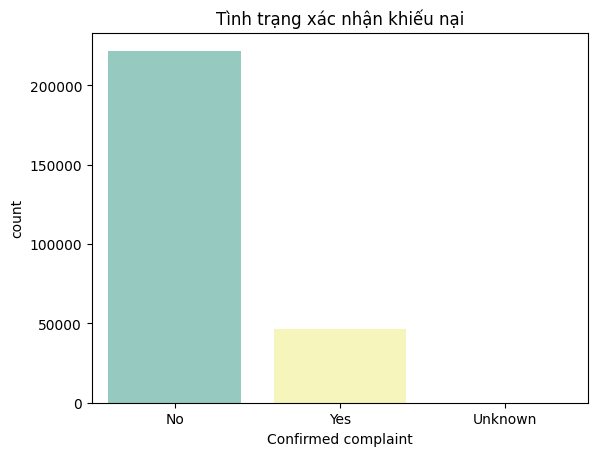

In [16]:
sns.countplot(data=df, x='Confirmed complaint', palette='Set3')
plt.title('Tình trạng xác nhận khiếu nại')
plt.show()

Dữ liệu cho thấy phần lớn các khiếu nại không được xác nhận (No), cho thấy hoặc là các khiếu nại không đủ cơ sở, hoặc quy trình xác nhận khiếu nại nghiêm ngặt. Tỷ lệ khiếu nại được xác nhận (Yes) chỉ chiếm một phần nhỏ, phản ánh mức độ đánh giá và kiểm chứng kỹ lưỡng từ phía công ty hoặc tổ chức giải quyết.

In [17]:
complaint_ct

Confirmed complaint,No,Unknown,Yes
Complaint type,,,
Children Health Insurance Plan,73.786408,0.000000,26.213592
Employee Retirement System,96.245734,0.443686,3.310580
FM Fire Sprinkler,100.000000,0.000000,0.000000
Government Relations,100.000000,0.000000,0.000000
Health Maintenance Org,73.072959,0.043396,26.883645
IRO Request,96.969697,0.000000,3.030303
Independent Review Org,91.387560,0.000000,8.612440
"Life, Accident and Health",84.646543,0.058142,15.295315
MC TIC 751.054,100.000000,0.000000,0.000000


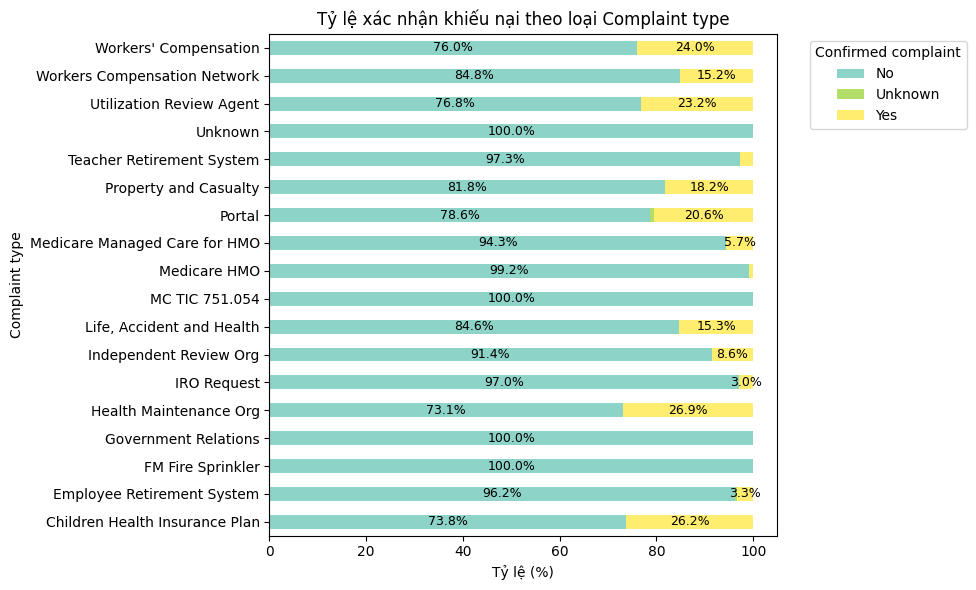

In [18]:
ax = complaint_ct.plot(kind='barh', stacked=True, figsize=(10, 6), colormap='Set3')
# Thêm nhãn phần trăm
for i, (index, row) in enumerate(complaint_ct.iterrows()):
    cum_width = 0
    for col in complaint_ct.columns:
        value = row[col]
        if value > 3:
            ax.text(cum_width + value / 2, i, f'{value:.1f}%', va='center', ha='center', fontsize=9, color='black')
        cum_width += value
plt.title('Tỷ lệ xác nhận khiếu nại theo loại Complaint type')
plt.xlabel('Tỷ lệ (%)')
plt.ylabel('Complaint type')
plt.legend(title='Confirmed complaint', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Tỷ lệ khiếu nại được xác nhận ("Yes") không đồng đều giữa các nhóm. Một số loại như **Life, Accident and Health** hoặc **Property and Casualty** có tỷ lệ xác nhận cao hơn, cho thấy người khiếu nại trong nhóm này thường cung cấp đầy đủ chứng cứ, hoặc nội dung khiếu nại dễ xác minh hơn.

Các nhóm như **Medicare HMO** hoặc **Teacher Retirement System** có tỷ lệ từ chối xác nhận ("No") khá cao. Điều này có thể xuất phát từ chính sách bảo hiểm rõ ràng hơn, thiếu cơ sở pháp lý để xác nhận khiếu nại, hoặc quy trình xét duyệt chặt chẽ hơn.

Một số loại khiếu nại có tỷ lệ "Unknown" , ví dụ **Portal**. Điều này có thể phản ánh sự thiếu nhất quán trong việc ghi nhận kết quả xác nhận hoặc tồn tại những trường hợp khiếu nại chưa được xử lý đầy đủ. Đây là điểm cần được các cơ quan quản lý lưu ý để cải thiện chất lượng dữ liệu.

In [19]:
# Nhóm theo 'Complaint type' và 'How resolved', đếm số lượng
resolution_counts = df.groupby(['Complaint type', 'How resolved']).size().reset_index(name='count')

# Lấy giải pháp phổ biến nhất cho mỗi loại khiếu nại
most_common_resolution = resolution_counts.sort_values('count', ascending=False).drop_duplicates('Complaint type')

print(most_common_resolution[['Complaint type', 'How resolved', 'count']])


                      Complaint type  \
3394       Life, Accident and Health   
6404           Property and Casualty   
723           Health Maintenance Org   
4245                    Medicare HMO   
295       Employee Retirement System   
7020    Workers Compensation Network   
1505          Independent Review Org   
6899       Teacher Retirement System   
4350                          Portal   
7173           Workers' Compensation   
55    Children Health Insurance Plan   
4304   Medicare Managed Care for HMO   
6950        Utilization Review Agent   
1453                     IRO Request   
370                FM Fire Sprinkler   
4181                  MC TIC 751.054   
372             Government Relations   
6935                         Unknown   

                                           How resolved  count  
3394                                    No Jurisdiction  18894  
6404                                   Question of Fact  11536  
723                       Contract Language/

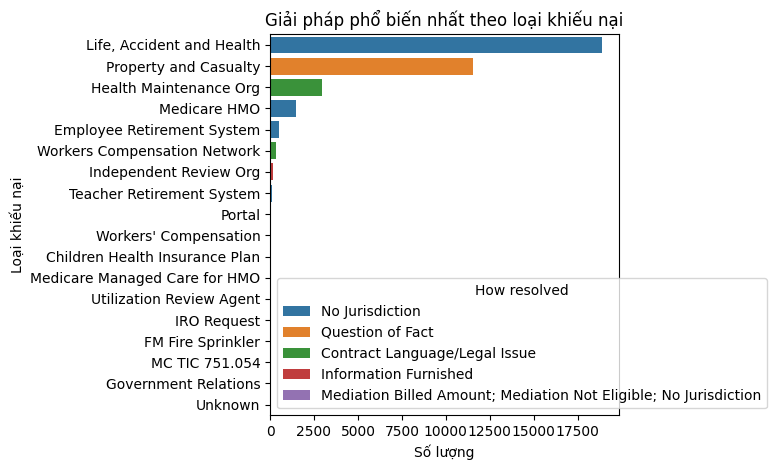

In [20]:
# Vẽ biểu đồ top giải pháp phổ biến nhất theo loại khiếu nại
sns.barplot(data=most_common_resolution.sort_values('count', ascending=False),
            y='Complaint type', x='count', hue='How resolved', dodge=False)
plt.title('Giải pháp phổ biến nhất theo loại khiếu nại')
plt.xlabel('Số lượng')
plt.ylabel('Loại khiếu nại')
plt.tight_layout()
plt.show()


**"No Jurisdiction"** là giải pháp phổ biến nhất cho rất nhiều loại khiếu nại

Điều này có thể cho thấy:

Nhiều khiếu nại bị loại bỏ vì không thuộc thẩm quyền của tổ chức xử lý.

Có thể cần đào sâu tại sao các khiếu nại này không được xử lý.

**"Contract Language / Legal Issue"** và **"Information Furnished"** cũng xuất hiện nhiều:

Có thể nhiều khiếu nại có bản chất liên quan đến tranh chấp điều khoản hợp đồng hoặc yêu cầu cung cấp thông tin.




##4. Phân bố cách xử lý khiếu nại

In [21]:
df_resolved = df['How resolved'].dropna()

all_resolutions = []
for entry in df_resolved:
    parts = [item.strip() for item in entry.split(';')]
    all_resolutions.extend(parts)
resolution_counts = Counter(all_resolutions)
resolution_df = pd.DataFrame.from_dict(resolution_counts, orient='index', columns=['Count'])
resolution_df = resolution_df.sort_values(by='Count', ascending=False).reset_index()
resolution_df = resolution_df.rename(columns={'index': 'Resolution'})

In [22]:
top_10_resolutions = resolution_df.head(10)
top_10_resolutions

,Resolution,Count
0,Information Furnished,100818
1,Contract Language/Legal Issue,92541
2,Question of Fact,56101
3,Additional Monies Received,37137
4,No Jurisdiction,36486
5,Claim Settled,30340
6,Company Position Upheld,27213
7,Additional Payment Expected,21030
8,Corrective Action Taken,17902
9,Mediation Billed Amount,13889


/tmp/ipython-input-23-1473383491.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_resolutions, x='Count', y='Resolution', palette='crest')


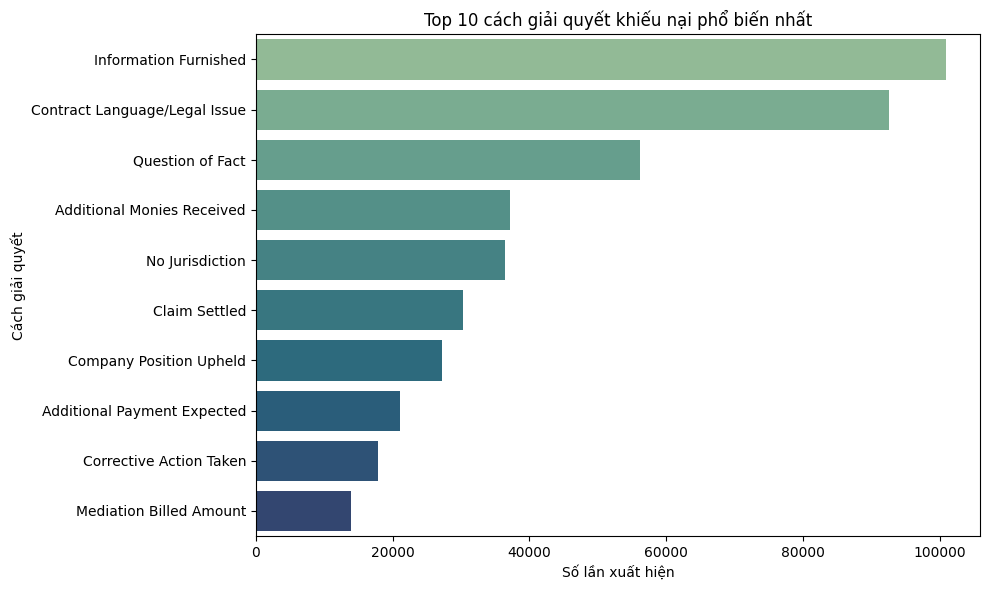

In [23]:
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_resolutions, x='Count', y='Resolution', palette='crest')
plt.title('Top 10 cách giải quyết khiếu nại phổ biến nhất')
plt.xlabel('Số lần xuất hiện')
plt.ylabel('Cách giải quyết')
plt.tight_layout()
plt.show()

Với biểu đồ trên ta có thẻ thấy

"**Information Furnished**" là cách xử lý phổ biến nhất – điều này cho thấy phần lớn các khiếu nại được giải quyết bằng cách cung cấp thêm thông tin cho người khiếu nại.

"**Contract Language/Legal Issue**" và "**Question of Fact**" cũng rất thường gặp → hàm ý rằng nhiều khiếu nại liên quan đến cách hiểu về điều khoản hợp đồng hoặc tranh cãi về sự kiện cụ thể.

"**Claim Settled**", "**Additional Monies Received**", và "**Additional Payment Expected**" liên quan đến bồi thường tài chính

"**Company Position Upheld**" xuất hiện nhiều → công ty khẳng định mình đúng, không công nhận khiếu nại.

Kết quả phân tích cho thấy, phần lớn khiếu nại được xử lý bằng cách cung cấp thêm thông tin (chiếm tỷ trọng cao nhất). Các vấn đề pháp lý và tranh chấp sự thật là hai nhóm lý do phổ biến tiếp theo. Đáng chú ý, số lượng khiếu nại được giải quyết bằng việc chấp nhận thanh toán thêm hoặc hoàn trả vẫn chiếm tỷ trọng đáng kể, p**hản ánh một phần khả năng công ty có sai sót trong quá trình xử lý yêu cầu ban đầu.**

##5. Số lượt xử lý khiếu nại qua từng năm

In [24]:
# Chuyển về datetime
df['Received date'] = pd.to_datetime(df['Received date'], errors='coerce')
df['Closed date'] = pd.to_datetime(df['Closed date'], errors='coerce')
# Tạo cột năm
df['Received Year'] = df['Received date'].dt.year
df['Closed Year'] = df['Closed date'].dt.year

In [25]:
# Đếm số khiếu nại nhận được mỗi năm
received_yearly = df['Received Year'].value_counts().sort_index().reset_index()
received_yearly.columns = ['Year', 'Received']

# Đếm số khiếu nại xử lý mỗi năm
closed_yearly = df['Closed Year'].value_counts().sort_index().reset_index()
closed_yearly.columns = ['Year', 'Closed']

compare_df = pd.merge(received_yearly, closed_yearly, on='Year', how='outer').sort_values('Year')
compare_df = compare_df.fillna(0)
compare_df

,Year,Received,Closed
0,2011,15,0.0
1,2012,11982,8274.0
2,2013,19853,21715.0
3,2014,23019,20821.0
4,2015,22802,21454.0
5,2016,27057,22086.0
6,2017,25395,22672.0
7,2018,28192,22061.0
8,2019,20393,31778.0
9,2020,13434,20368.0


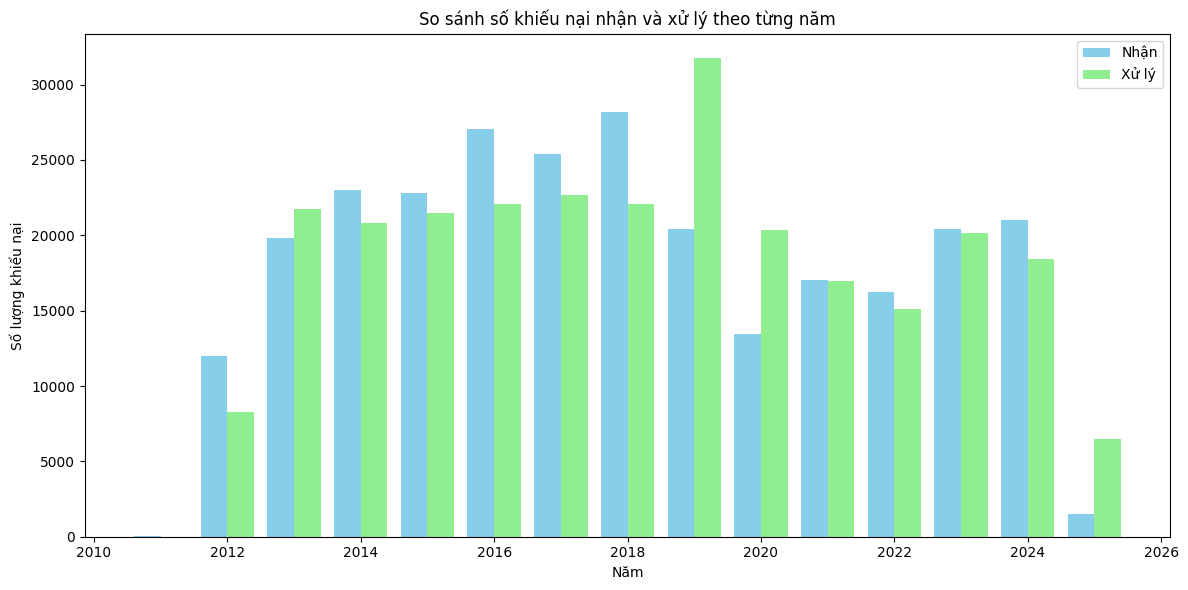

In [26]:
plt.figure(figsize=(12, 6))
plt.bar(compare_df['Year'] - 0.2, compare_df['Received'], width=0.4, label='Nhận', color='skyblue')
plt.bar(compare_df['Year'] + 0.2, compare_df['Closed'], width=0.4, label='Xử lý', color='lightgreen')

plt.xlabel('Năm')
plt.ylabel('Số lượng khiếu nại')
plt.title('So sánh số khiếu nại nhận và xử lý theo từng năm')
plt.legend()
plt.tight_layout()
plt.show()

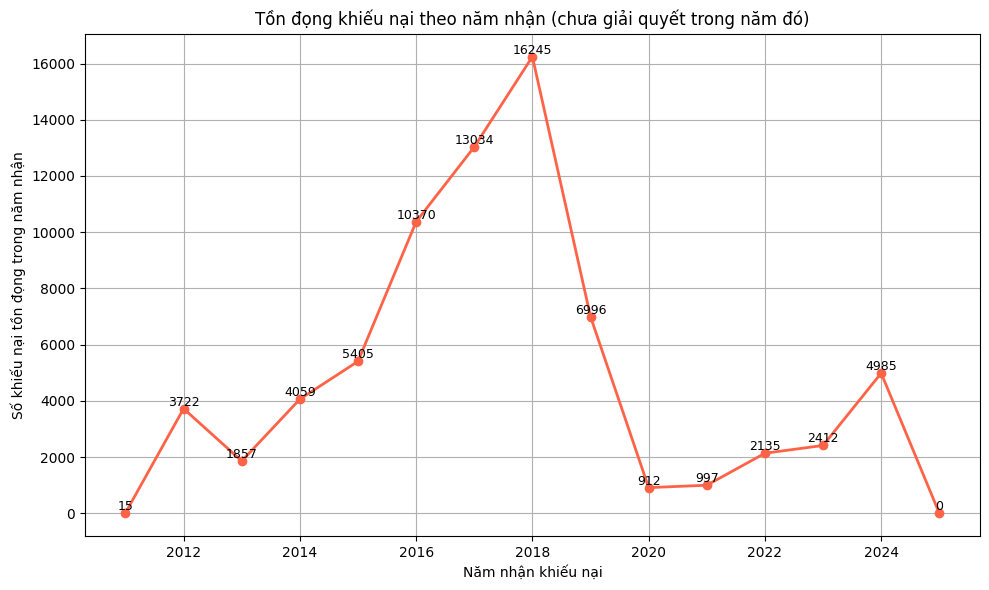

In [27]:
df['Year_received'] = df['Received date'].dt.year
df['Year_closed'] = df['Closed date'].dt.year

# Lấy danh sách các năm nhận
years = sorted(df['Year_received'].dropna().unique())

backlog_list = []

for year in years:
    # Số khiếu nại nhận trong năm đó
    total_received = df[df['Year_received'] == year].shape[0]

    # Số khiếu nại nhận năm đó và được đóng trong năm đó
    closed_in_same_year = df[(df['Year_received'] == year) & (df['Year_closed'] == year)].shape[0]

    # Tồn đọng = nhận - đóng trong cùng năm
    backlog = total_received - closed_in_same_year

    backlog_list.append({'Year': year, 'Backlog': backlog})

backlog_df = pd.DataFrame(backlog_list)

# Vẽ biểu đồ tồn đọng theo năm nhận
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(backlog_df['Year'], backlog_df['Backlog'], marker='o', color='tomato', linewidth=2)

for x, y in zip(backlog_df['Year'], backlog_df['Backlog']):
    plt.text(x, y, str(y), fontsize=9, ha='center', va='bottom')

plt.title('Tồn đọng khiếu nại theo năm nhận (chưa giải quyết trong năm đó)')
plt.xlabel('Năm nhận khiếu nại')
plt.ylabel('Số khiếu nại tồn đọng trong năm nhận')
plt.grid(True)
plt.tight_layout()
plt.show()


  1. Giai đoạn tăng trưởng nóng và khủng hoảng xử lý (2012–2018)

Trong giai đoạn này, hệ thống bảo hiểm trải qua một sự tăng trưởng nhanh chóng về số lượng khiếu nại, phản ánh sự mở rộng quy mô của ngành cũng như sự gia tăng nhận thức của khách hàng về quyền lợi bảo hiểm. Tuy nhiên, bên cạnh những tín hiệu tích cực này, một thách thức lớn đã xuất hiện: hệ thống xử lý khiếu nại không thể đáp ứng kịp với tốc độ tăng trưởng nhanh của lượng hồ sơ mới. Đặc biệt, năm 2018 đánh dấu đỉnh điểm của sự quá tải khi khoảng cách giữa khiếu nại nhận và xử lý lên mức cao nhất. Điều này không chỉ làm tồn đọng tích lũy tăng mạnh mà còn có thể ảnh hưởng tiêu cực đến uy tín và sự hài lòng của khách hàng. Về mặt quản lý, đây là giai đoạn cần thiết phải đánh giá lại năng lực xử lý, nhân lực và quy trình để đảm bảo tính bền vững trong vận hành.
  2. Giai đoạn “giải cứu tồn đọng” (2019–2020)

Giai đoạn này là một bước ngoặt quan trọng khi công ty đã triển khai các biện pháp mạnh mẽ nhằm giảm thiểu tồn đọng đã tích tụ. Việc số lượng hồ sơ xử lý vượt qua số hồ sơ mới thể hiện một chiến dịch có hệ thống, có thể bao gồm tăng cường nguồn lực xử lý, tối ưu quy trình và tạm ngưng hoặc giảm tiếp nhận hồ sơ mới. Thêm vào đó, tác động của đại dịch COVID-19 dẫn đến sự giảm mạnh về số lượng khiếu nại mới, tạo điều kiện thuận lợi cho công tác “dọn dẹp” backlog. Mặc dù vậy, việc giảm tiếp nhận hồ sơ mới có thể ảnh hưởng tới dịch vụ khách hàng nếu không được cân đối hợp lý. Giai đoạn này cho thấy năng lực quản lý rủi ro tồn đọng và khả năng ứng phó linh hoạt với tình hình thực tế.

3. Giai đoạn cân bằng tạm thời, nhưng rủi ro tái phát (2021–2024)

Sau thời gian dọn dẹp tồn đọng, hệ thống đã trở lại trạng thái ổn định với số lượng khiếu nại mới duy trì ở mức 16.000–21.000 vụ/năm. Tuy nhiên, tồn đọng tích lũy bắt đầu có dấu hiệu tăng trở lại, cảnh báo về nguy cơ quay lại trạng thái quá tải. Điều này cho thấy mặc dù đã có những cải tiến, hệ thống chưa có sự thay đổi mang tính đột phá hoặc bền vững để xử lý tốt lượng khiếu nại phát sinh. Nếu không có các biện pháp cải tiến lâu dài như tự động hóa, nâng cao năng lực xử lý, hoặc thay đổi quy trình một cách toàn diện, rất có thể tình trạng backlog sẽ tiếp tục tái diễn, gây áp lực lên hệ thống và làm giảm chất lượng dịch vụ. Giai đoạn này đòi hỏi sự đầu tư chiến lược và quản trị hiệu quả để duy trì cân bằng và phòng tránh khủng hoảng trong tương lai.

1. Giai đoạn tăng trưởng nóng (2012–2018)
Số lượng khiếu nại tăng mạnh:

2012: < 5.000 vụ

2018: hơn 16.000 vụ

Phân tích chi tiết:

Tăng trưởng trung bình hàng năm khoảng 20-30% (tùy số liệu cụ thể).

Năm 2018 đạt đỉnh, số khiếu nại mới vượt khả năng xử lý, tạo backlog lớn.

Tồn đọng tích lũy:

Tồn đọng tăng đều mỗi năm, đặc biệt đột biến vào năm 2018.

Có thể biểu diễn bằng biểu đồ đường thể hiện số khiếu nại nhận, xử lý và tồn đọng mỗi năm.

2. Giai đoạn giải cứu tồn đọng (2019–2020)
Số lượng khiếu nại mới giảm mạnh:

Do COVID-19 và có thể do chính sách hạn chế nhận hồ sơ mới.

Ví dụ: giảm từ 28.000 xuống còn khoảng 16.000 vụ/năm.

Số lượng xử lý tăng hoặc vượt số mới:

Năm 2019-2020: số hồ sơ xử lý > số hồ sơ nhận, backlog giảm.

Phân tích chi tiết:

Tốc độ xử lý tăng nhanh nhờ tăng nhân lực hoặc cải tiến quy trình.

Biểu đồ thanh hoặc đường thể hiện số khiếu nại nhận, xử lý và tồn đọng theo từng năm.

3. Giai đoạn cân bằng tạm thời (2021–2024)
Lượng khiếu nại ổn định:

Khoảng 16.000–21.000 vụ mỗi năm.

Tồn đọng tích lũy bắt đầu tăng nhẹ:

Biểu thị bằng đường tồn đọng tăng trở lại, mặc dù lượng khiếu nại mới không tăng mạnh.

Phân tích chi tiết:

Cho thấy hệ thống xử lý không còn đủ hiệu quả như giai đoạn 2019-2020.

Cần phân tích nguyên nhân tồn đọng tăng (nhân lực, quy trình, công nghệ).

Đề xuất:

Theo dõi kỹ tồn đọng hàng tháng, rà soát quy trình xử lý.



##6. Thời gian xử lý giữa cái loại khiếu nại

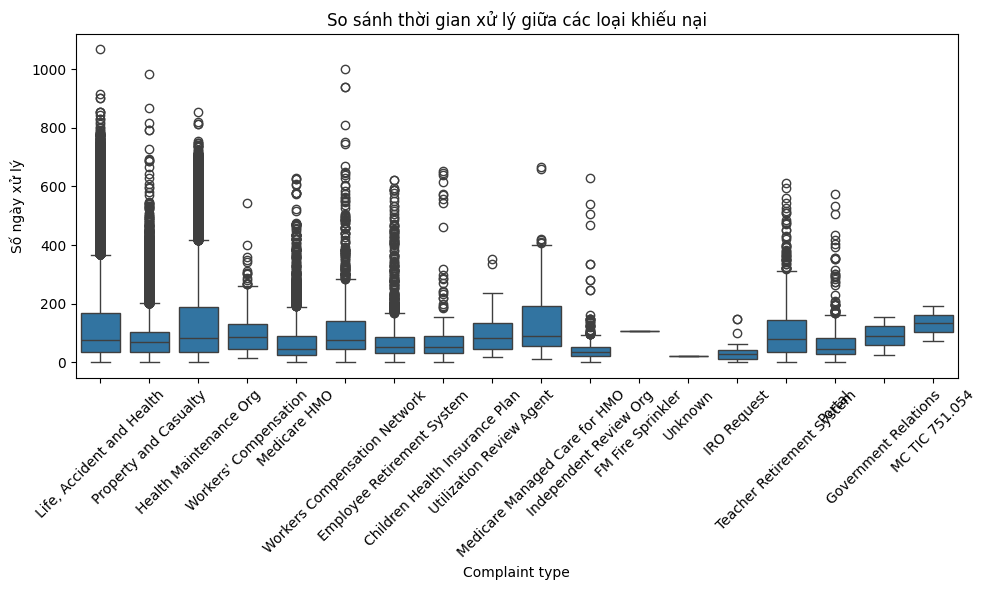

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Complaint type', y='processing_time')
plt.xticks(rotation=45)
plt.title('So sánh thời gian xử lý giữa các loại khiếu nại')
plt.ylabel('Số ngày xử lý')
plt.tight_layout()
plt.show()


In [29]:
import scipy.stats as stats
contingency_table = pd.crosstab(df['Complainant type'], df['Confirmed complaint'])
chi2, p, dof, ex = stats.chi2_contingency(contingency_table)
print(f"p-value: {p}")


p-value: 1.5595236844987863e-181


##7. Tỷ lệ xác nhận theo loại bảo hiểm liên quan

Phân tích này để xem loại bảo hiểm nào **bị khiếu nạp nhiều nhất** và đ**ược xác nhận nhiều nhất**

***Top 10 loại bảo hiểm liên quan khiếu nại nhiều nhất***

In [30]:
top_coverage = df['Coverage type'].value_counts().nlargest(10)
print(top_coverage)

Coverage type
Accident and Health         111988
Automobile                   87803
Homeowners                   37651
Life & Annuity               15645
Miscellaneous                 9168
Liability                     3584
Fire, Allied Lines & CMP      2501
Unknown                         49
Name: count, dtype: int64


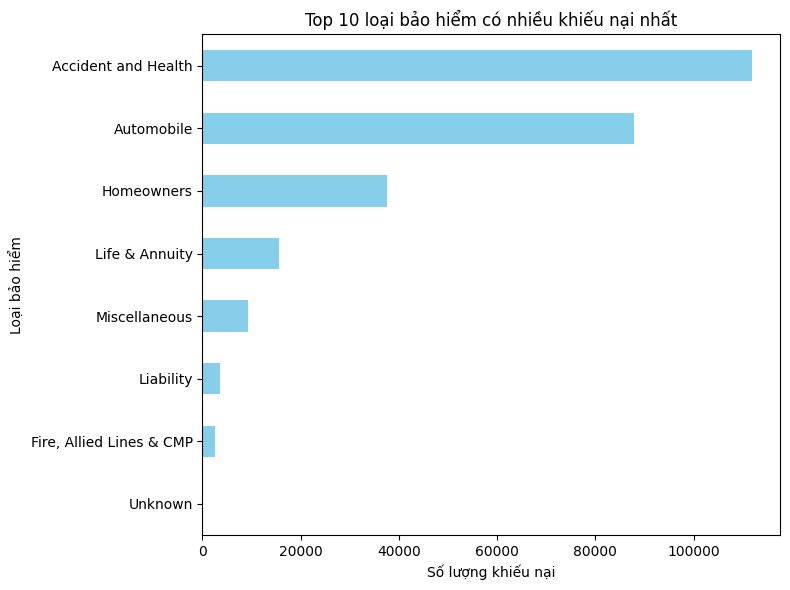

In [31]:
top_coverage.plot(kind='barh', figsize=(8, 6), color='skyblue')
plt.title('Top 10 loại bảo hiểm có nhiều khiếu nại nhất')
plt.xlabel('Số lượng khiếu nại')
plt.ylabel('Loại bảo hiểm')
plt.gca().invert_yaxis()  # Loại phổ biến nhất ở trên cùng
plt.tight_layout()
plt.show()

***Tỷ lệ xác nhận  kiếu nại của các loại bảo hiểm liên quan***

In [32]:
df['Confirmed complaint'] = df['Confirmed complaint'].map({
    'Yes': True,
    'No': False,
    'Unknown': np.nan
})

In [33]:
coverage_type_rate = df.groupby('Coverage type')['Confirmed complaint'].mean().sort_values(ascending=False)

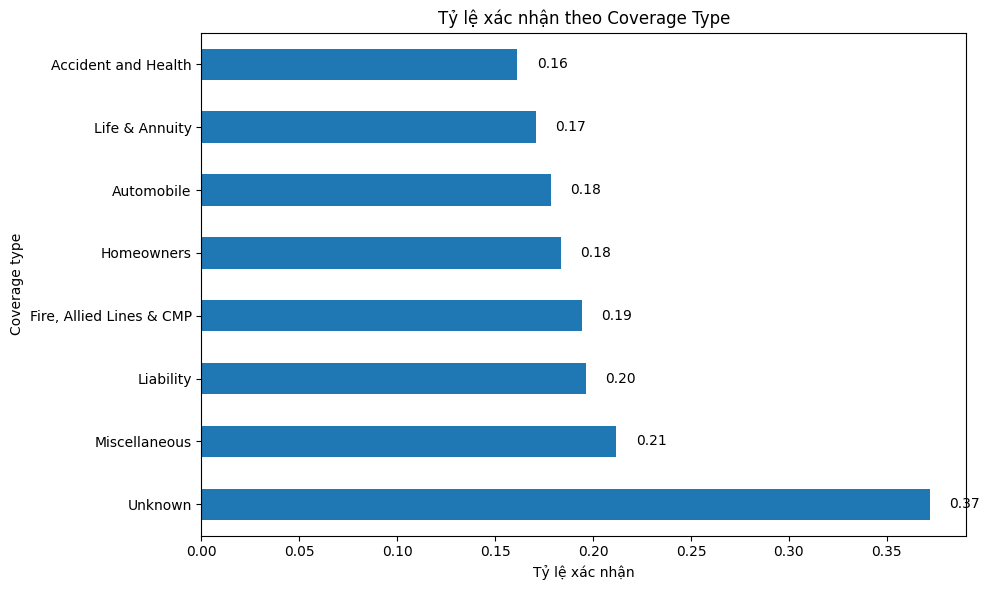

In [34]:
import matplotlib.pyplot as plt

ax = coverage_type_rate.plot(kind='barh', figsize=(10, 6), title='Tỷ lệ xác nhận theo Coverage Type')
plt.xlabel('Tỷ lệ xác nhận')

# Gắn nhãn giá trị
for i, v in enumerate(coverage_type_rate):
    ax.text(v + 0.01, i, f'{v:.2f}', va='center')

plt.tight_layout()
plt.show()


***Nhận xét ***

Các loại bị khiếu nại nhiều như Accident and Health, Automobile, Homeowners lại có tỷ lệ xác nhận rất thấp (~16%–18%). Cho thấy những loại bảo hiểm này quy trình xử lý có thể chưa tối ưu có nhiều lỗ hổng dẫn đến việc có nhiều loại khiếu nại, có thể do thiếu minh bạch hợp đồng hoặc thông tin. Song song đó là việc khiểm tra khiếu nại chặc chẽ dẫn đến việc tỷ lệ xác nhận khiếu nại thấp.

Một số loại ít phổ biến hơn như Miscellaneous, Liability, Fire có tỷ lệ xác nhận cao hơn (~20–21%). Cho thấy những lạo bảo hiểm này có quy trình xử lý tốt ít bị khiếu nại. Tuy nhiên tỷ lệ xác nhận lại thuộc nhóm cao,có thể là do kiểm tra khiếu nại chưa tốt hoặc khiếu nại đầy đủ bằng chứng. Khiếu nại tuy ít nhưng lại rất nhiêu hợp lệ.


***Thời gian xử lý trung bình theo loại bảo hiểm***

In [35]:
avg_processing_time = df.groupby('Coverage type')['processing_time'].mean().sort_values()

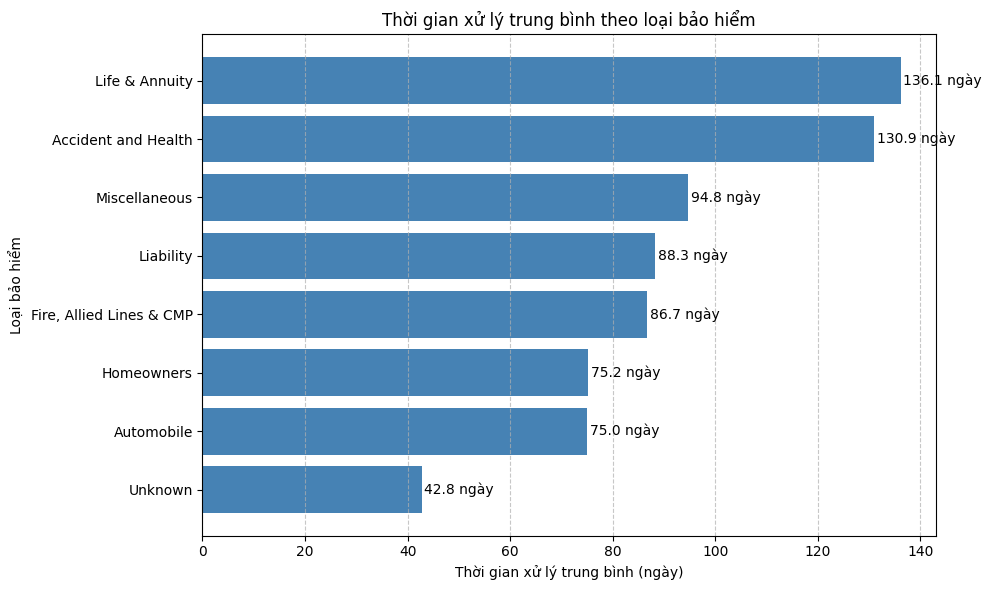

In [36]:
plt.figure(figsize=(10, 6))
bars = plt.barh(avg_processing_time.index, avg_processing_time.values, color='steelblue')
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.5,
             bar.get_y() + bar.get_height()/2,
             f'{width:.1f} ngày',
             va='center')
plt.xlabel('Thời gian xử lý trung bình (ngày)')
plt.ylabel('Loại bảo hiểm')
plt.title('Thời gian xử lý trung bình theo loại bảo hiểm')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Nhận xét**

***Cách giải quyết khiếu nại theo lại bảo hiểm liên quan***

In [37]:
df['Reason complaint filed list'] = df['Reason complaint filed'].str.split('; ')
df_exploded = df.explode('Reason complaint filed list')
ct = pd.crosstab(df_exploded['Coverage type'], df_exploded['Reason complaint filed list'])

print(ct)

Reason complaint filed list  Accelerated Benefits  Access to Care  \
Coverage type                                                       
Accident and Health                             0            3093   
Automobile                                      0               1   
Fire, Allied Lines & CMP                        0               0   
Homeowners                                      0               0   
Liability                                       0               0   
Life & Annuity                                  7               9   
Miscellaneous                                   0             201   
Unknown                                         0               0   

Reason complaint filed list  Access to Health Record Denied  Agency Balance  \
Coverage type                                                                 
Accident and Health                                       1              64   
Automobile                                                0             

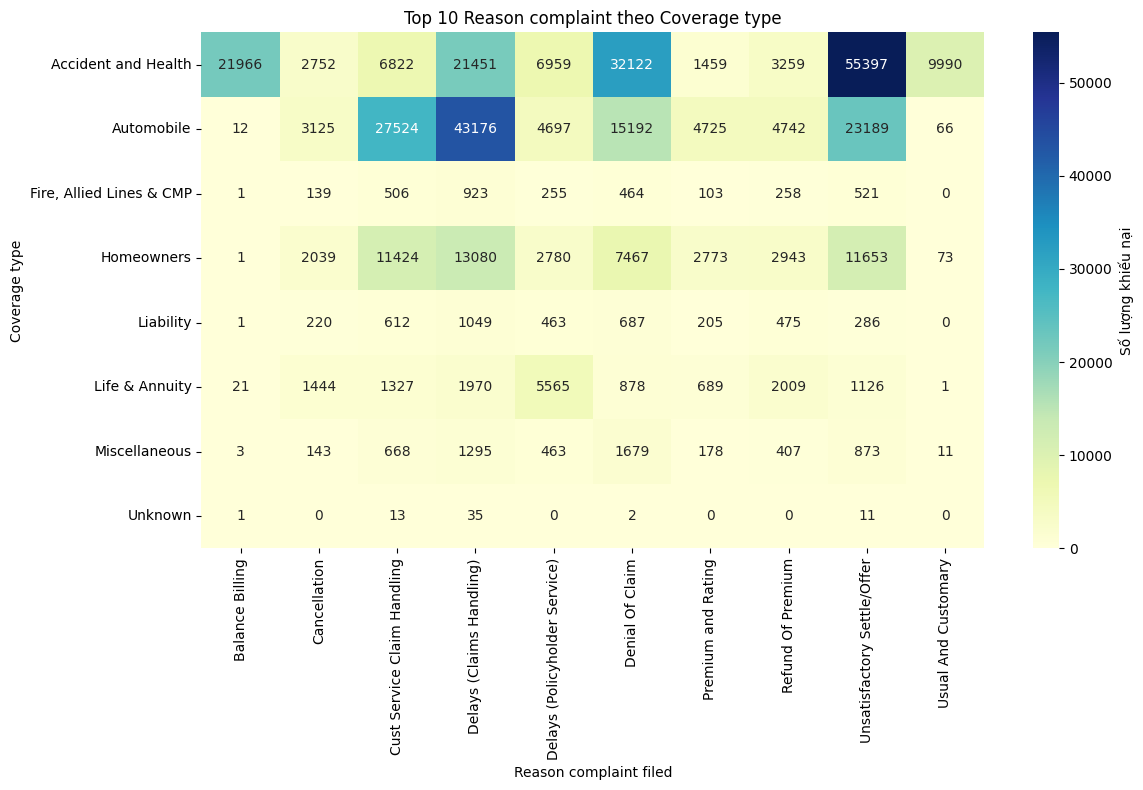

In [38]:
top_10_reasons = df_exploded['Reason complaint filed list'].value_counts().head(10).index
df_top10 = df_exploded[df_exploded['Reason complaint filed list'].isin(top_10_reasons)]
ct_top10 = pd.crosstab(df_top10['Coverage type'], df_top10['Reason complaint filed list'])

# Vẽ heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(ct_top10, cmap='YlGnBu', annot=True, fmt='d', cbar_kws={'label': 'Số lượng khiếu nại'})
plt.title('Top 10 Reason complaint theo Coverage type')
plt.ylabel('Coverage type')
plt.xlabel('Reason complaint filed')
plt.tight_layout()
plt.show()


In [39]:
df_top10.to_csv("df_top10.csv", index=False)

**Nhận xét**

#2. Phân tích theo chủ thể liên quan

##1. Ai bị khiếu nại nhiều nhất

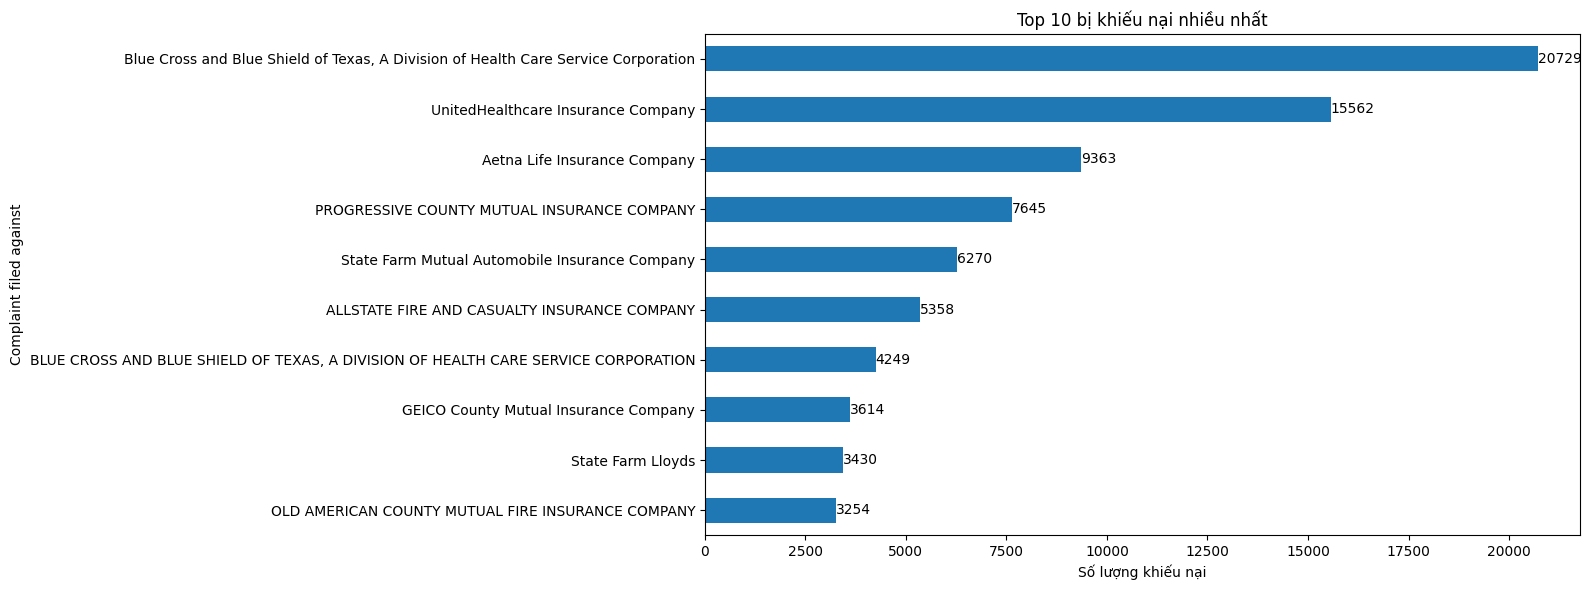

In [40]:
top_targets = df['Complaint filed against'].value_counts().head(10)

ax = top_targets.plot(kind='barh', title='Top 10 bị khiếu nại nhiều nhất', figsize=(16,6))
ax.invert_yaxis()  # Để giá trị cao nhất nằm trên cùng
ax.set_xlabel("Số lượng khiếu nại")

# Thêm số trên từng thanh
for i, v in enumerate(top_targets.values):
    ax.text(v + 1, i, str(v), va='center')  # v + 1 để số nằm bên phải thanh

plt.tight_layout()
plt.show()

##2. Vai trò nào thường bị khiếu nại

<Axes: title={'center': 'Vai trò bị khiếu nại nhiều nhất'}, xlabel='Respondent Role'>

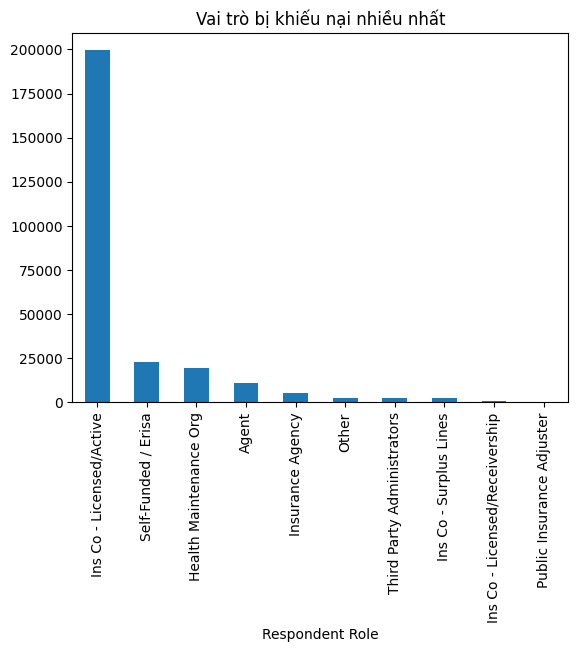

In [41]:
df['Respondent Role'].value_counts().head(10).plot(kind='bar', title='Vai trò bị khiếu nại nhiều nhất')

In [42]:
df.groupby('Respondent Role')['Confirmed complaint'].value_counts(normalize=True).unstack()

Confirmed complaint,False,True
Respondent Role,,
Agent,0.649140,0.350860
Attorney,0.866667,0.133333
Claimant / Insured,0.714286,0.285714
Claimant Representative,1.000000,NaN
Claims Adjuster,0.713675,0.286325
Continuing Care Retiremt Comm,1.000000,NaN
Continuing Education Provider,NaN,1.000000
DWC HCP Designated Doctor,1.000000,NaN
DWC HCP Facility,1.000000,NaN


##3. Ai là người khiếu nại nhiều nhất

<Axes: xlabel='Complainant type'>

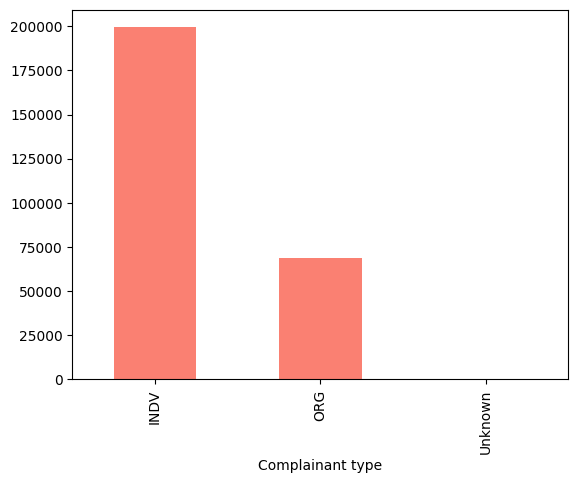

In [43]:
df['Complainant type'].value_counts().plot(kind='bar', color='salmon')

<Axes: title={'center': 'Tỷ lệ xác nhận theo loại người khiếu nại'}, xlabel='Complainant type'>

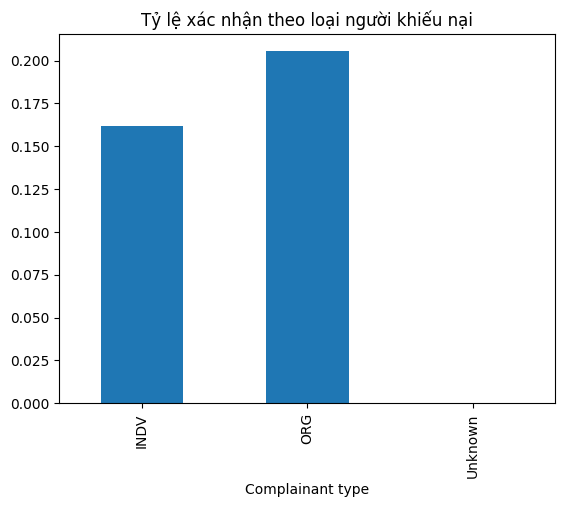

In [44]:
confirmed_rate = df.groupby('Complainant type')['Confirmed complaint'].value_counts(normalize=True).unstack()
confirmed_rate[True].plot(kind='bar', title='Tỷ lệ xác nhận theo loại người khiếu nại')

In [45]:
from scipy.stats import f_oneway

groups = [group['processing_time'].dropna() for _, group in df.groupby('Complainant type')]

f_stat, p_value = f_oneway(*groups)
print(f"p-value: {p_value}")


p-value: 0.0


##4.  Tỷ lệ xác nhận theo vai trò bị khiếu nại

In [46]:
confirmed_rate_role = df.groupby('Respondent Role')['Confirmed complaint'].apply(lambda x: (x == True).mean()).sort_values(ascending=False)
top10 = confirmed_rate_role.sort_values(ascending=False).head(10)
top10_percent = top10 * 100

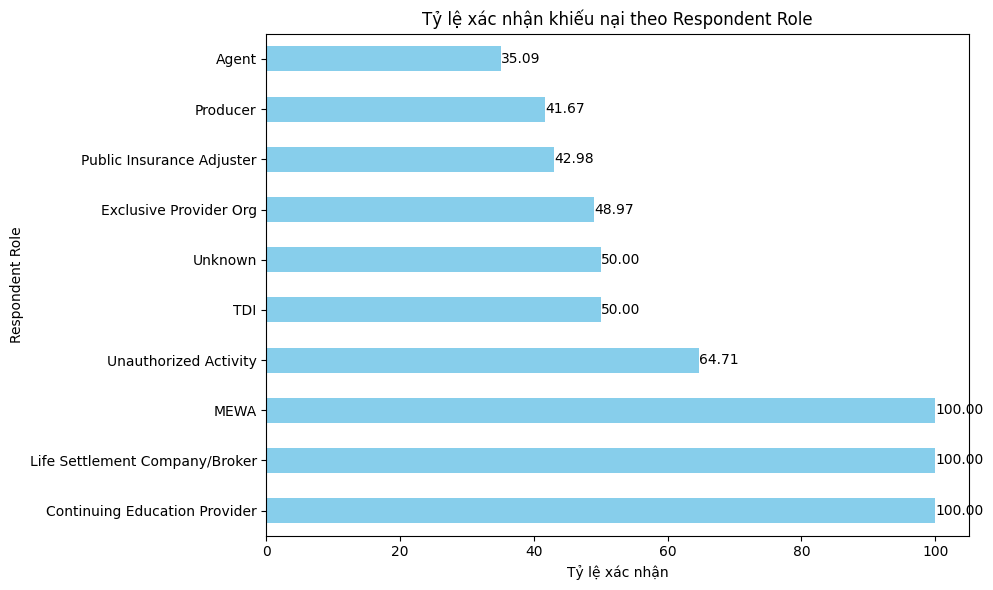

In [47]:

plt.figure(figsize=(10,6))
ax = top10_percent.plot(kind='barh', color='skyblue')
plt.title('Tỷ lệ xác nhận khiếu nại theo Respondent Role')
plt.xlabel('Tỷ lệ xác nhận')
plt.ylabel('Respondent Role')

# Gắn nhãn số liệu
for i, v in enumerate(top10_percent):
    ax.text(v + 0.01, i, f'{v:.2f}', va='center')

plt.tight_layout()
plt.show()

##5. So sánh thời gian xử lý theo loại người khiếu nại

In [48]:
df.groupby('Complainant type')['processing_time'].mean().sort_values()

,processing_time
Complainant type,
INDV,94.301644
ORG,127.751312
Unknown,200.000000


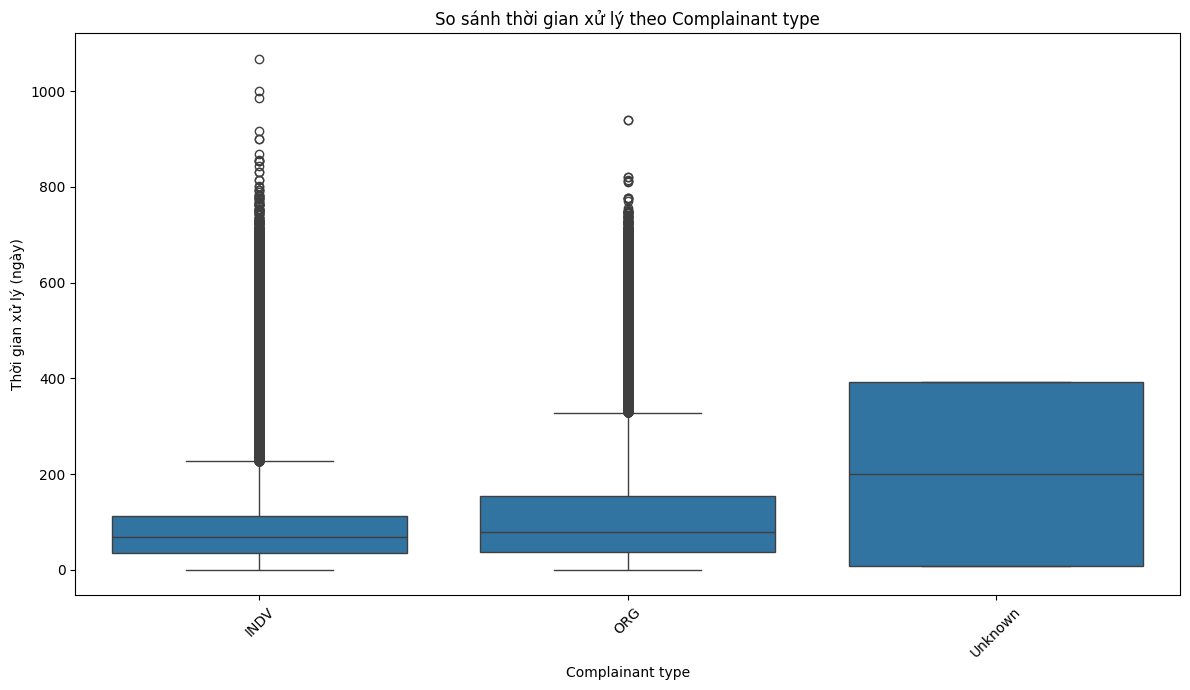

In [49]:
plt.figure(figsize=(12, 7))
sns.boxplot(data=df, x='Complainant type', y='processing_time')
plt.title('So sánh thời gian xử lý theo Complainant type')
plt.ylabel('Thời gian xử lý (ngày)')
plt.xlabel('Complainant type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##6. Kết hợp 3 chiều: Người khiếu nại × Vai trò bị khiếu nại × Tỷ lệ xác nhận

In [50]:
top_complainants = df['Complainant type'].value_counts().head(8).index
top_respondents = df['Respondent Role'].value_counts().head(10).index

df_filtered = df[
    (df['Complainant type'].isin(top_complainants)) &
    (df['Respondent Role'].isin(top_respondents))
]

In [51]:
pivot_filtered = pd.crosstab(
    df_filtered['Complainant type'],
    df_filtered['Respondent Role'],
    values=df_filtered['Confirmed complaint'],
    aggfunc=lambda x: (x == True).mean()
)

In [52]:
pivot_filtered = pivot_filtered.apply(pd.to_numeric, errors='coerce')
pivot_filtered = pivot_filtered.fillna(0)

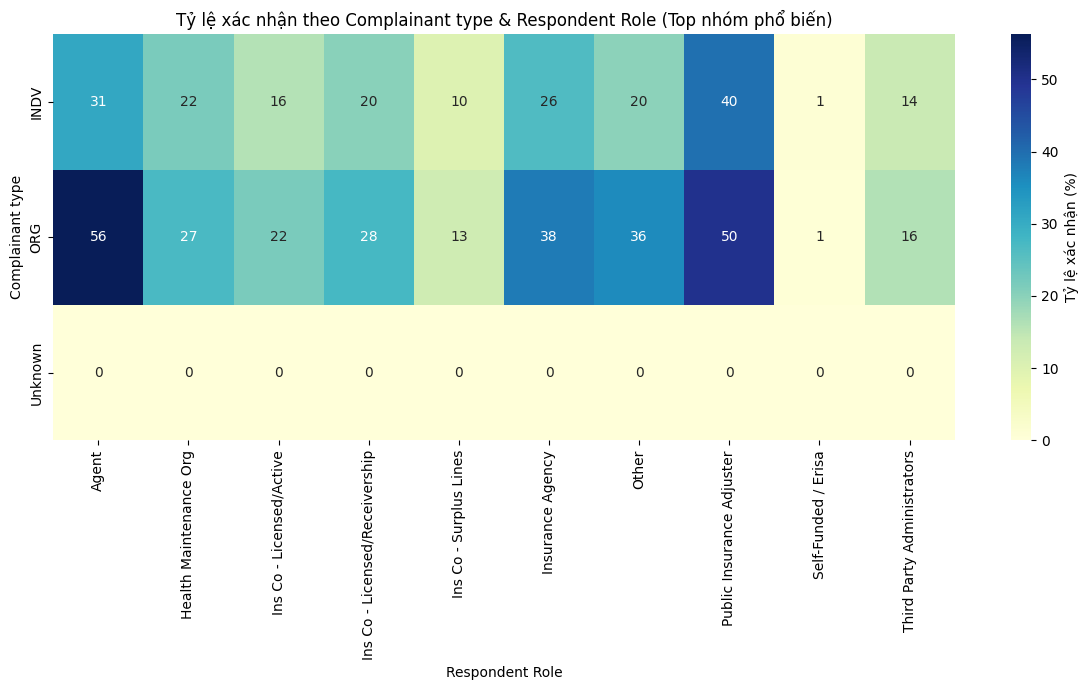

In [53]:
plt.figure(figsize=(12, 7))
sns.heatmap(pivot_filtered * 100, annot=True, fmt=".0f", cmap='YlGnBu', cbar_kws={'label': 'Tỷ lệ xác nhận (%)'})
plt.title('Tỷ lệ xác nhận theo Complainant type & Respondent Role (Top nhóm phổ biến)')
plt.ylabel('Complainant type')
plt.xlabel('Respondent Role')
plt.tight_layout()
plt.show()

##7. Thống kê nhóm người khiếu nại đáng tin cậy

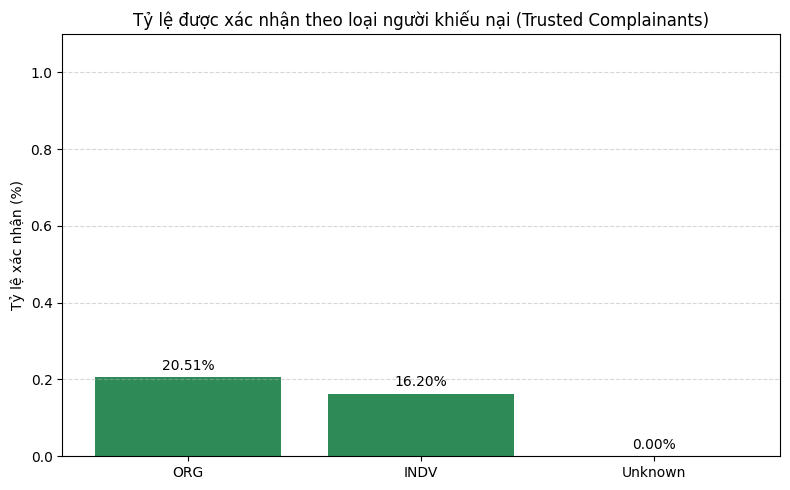

In [54]:
confirmed_rate = (
    df.groupby('Complainant type')['Confirmed complaint']
    .apply(lambda x: (x == True).mean())
    .sort_values(ascending=False)
)
plt.figure(figsize=(8, 5))
bars = plt.bar(confirmed_rate.index, confirmed_rate.values, color='seagreen')

# Thêm nhãn số trên cột
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.02, f"{height:.2%}", ha='center')

plt.title('Tỷ lệ được xác nhận theo loại người khiếu nại (Trusted Complainants)')
plt.ylabel('Tỷ lệ xác nhận (%)')
plt.ylim(0, 1.1)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

##8. Phân tích khiếu nại có nhiều bên liên quan



In [55]:
def split_others(cell):
    if pd.isna(cell) or str(cell).strip().lower() == 'no':
        return []
    parts = str(cell).replace('\n', ';').split(';')
    return [p.strip() for p in parts if p.strip() != '']

df['others_list'] = df['Others involved'].apply(split_others)
df['num_others'] = df['others_list'].apply(len)
df['has_others'] = df['num_others'] > 0

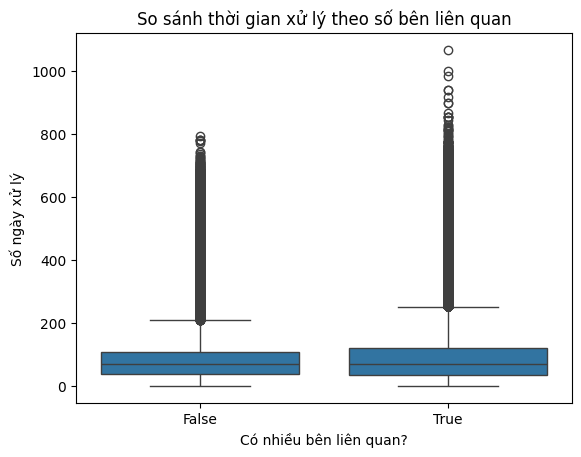

In [56]:
df_clean = df.dropna(subset=['processing_time'])

# Vẽ boxplot
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='has_others', y='processing_time', data=df_clean)
plt.title("So sánh thời gian xử lý theo số bên liên quan")
plt.xlabel("Có nhiều bên liên quan?")
plt.ylabel("Số ngày xử lý")
plt.show()

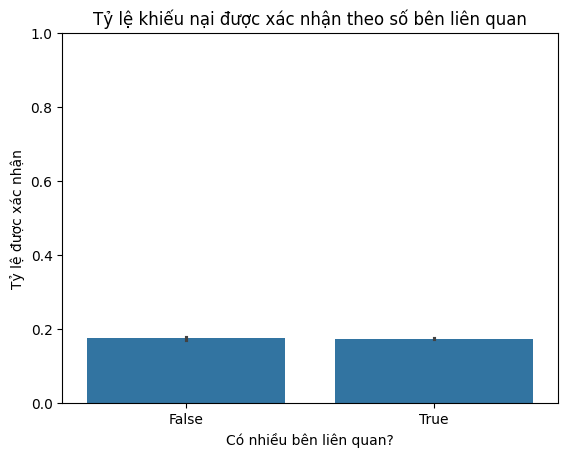

In [57]:
sns.barplot(x='has_others', y='Confirmed complaint', data=df)
plt.title("Tỷ lệ khiếu nại được xác nhận theo số bên liên quan")
plt.xlabel("Có nhiều bên liên quan?")
plt.ylabel("Tỷ lệ được xác nhận")
plt.ylim(0, 1)
plt.show()

Từ 2 biểu đồ cho thấy thời gian xử lý khiếu nại và tỷ lệ khiếu nại được xác nhận giữa có bên liên quan và không có bên liên quan là gần nhưng bằng nhau. Có thể kết luận việc có nhiều bên liên quan hay không. Không ảnh hưởng đến việc giải quyết khiếu nại

#3.Phân tích rủi ro & cảnh báo sớm

***Dự báo loại khiếu nại tăng mạnh***

In [58]:
df['Month'] = df['Received date'].dt.to_period('M').dt.to_timestamp()

complaint_monthly = df.groupby(['Month', 'Complaint type']).size().reset_index(name='count')

In [59]:
top_types = df['Complaint type'].value_counts().head(5).index
df_top = complaint_monthly[complaint_monthly['Complaint type'].isin(top_types)]

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbljm15bx/7yuvol6g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbljm15bx/zry23m9x.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64155', 'data', 'file=/tmp/tmpbljm15bx/7yuvol6g.json', 'init=/tmp/tmpbljm15bx/zry23m9x.json', 'output', 'file=/tmp/tmpbljm15bx/prophet_modelme3fikyq/prophet_model-20250629185307.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:53:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:53:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages/

Forecast for Property and Casualty


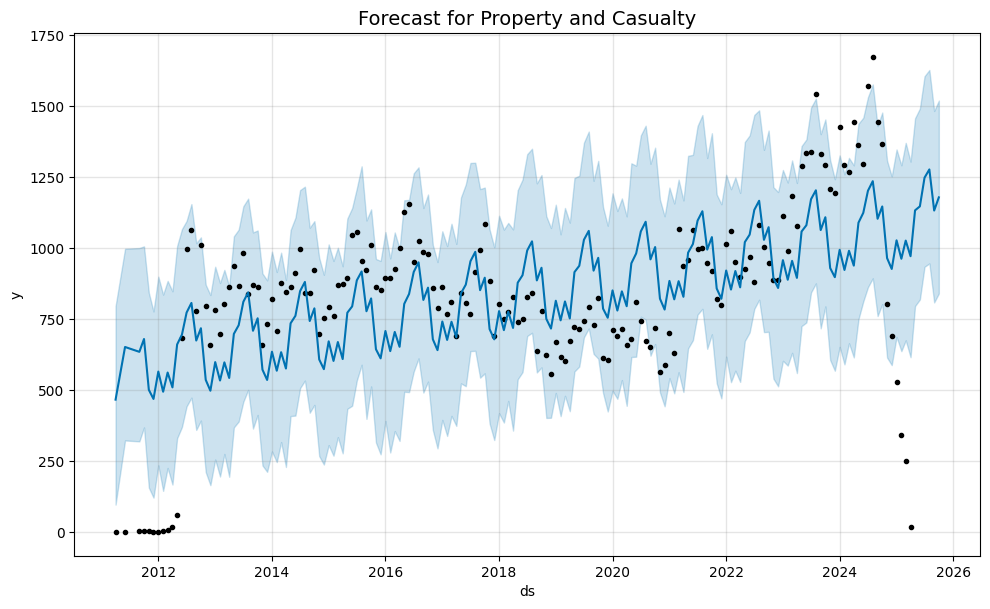

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbljm15bx/e88zvo4h.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbljm15bx/3b_vfs7a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6836', 'data', 'file=/tmp/tmpbljm15bx/e88zvo4h.json', 'init=/tmp/tmpbljm15bx/3b_vfs7a.json', 'output', 'file=/tmp/tmpbljm15bx/prophet_model08vp3n7p/prophet_model-20250629185307.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:53:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:53:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages/p

Forecast for Life, Accident and Health


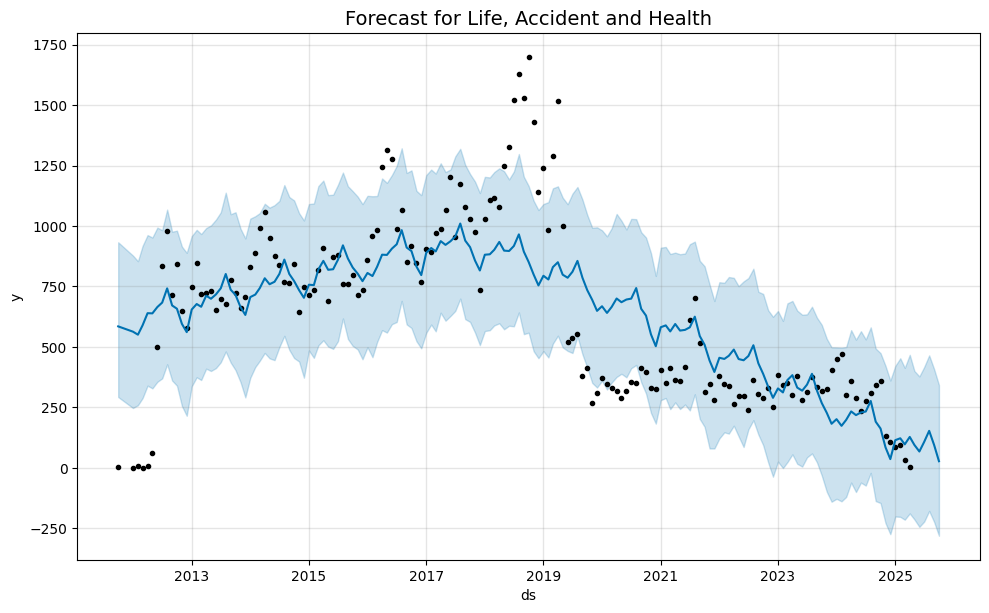

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbljm15bx/x01wkju0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbljm15bx/9jie0uqp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86082', 'data', 'file=/tmp/tmpbljm15bx/x01wkju0.json', 'init=/tmp/tmpbljm15bx/9jie0uqp.json', 'output', 'file=/tmp/tmpbljm15bx/prophet_modelixefnl40/prophet_model-20250629185308.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:53:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:53:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages/

Forecast for Health Maintenance Org


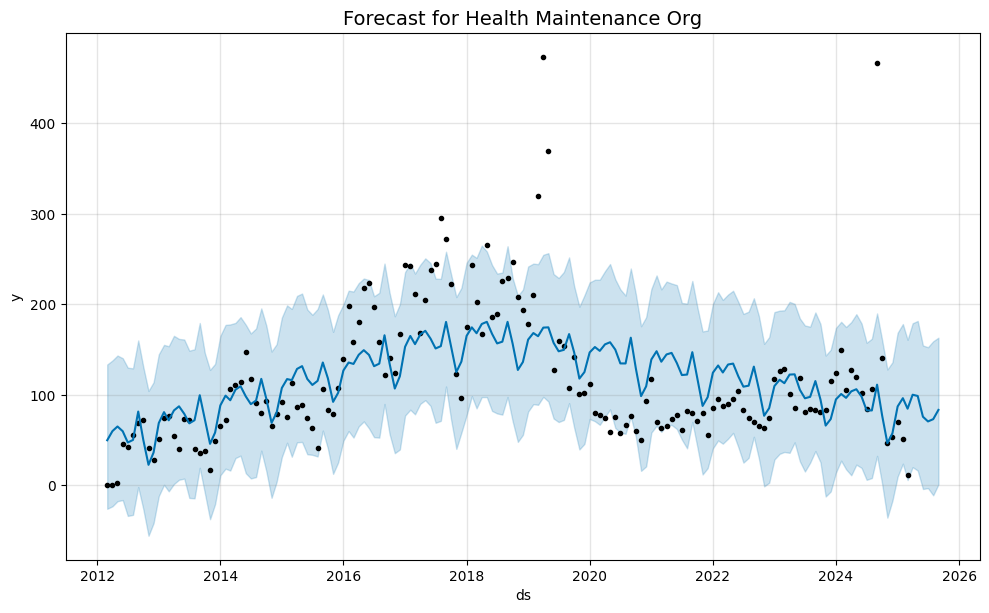

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbljm15bx/b8pn12fj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbljm15bx/v6i_31ko.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88390', 'data', 'file=/tmp/tmpbljm15bx/b8pn12fj.json', 'init=/tmp/tmpbljm15bx/v6i_31ko.json', 'output', 'file=/tmp/tmpbljm15bx/prophet_model1mnt3zz4/prophet_model-20250629185308.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:53:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:53:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages/

Forecast for Employee Retirement System


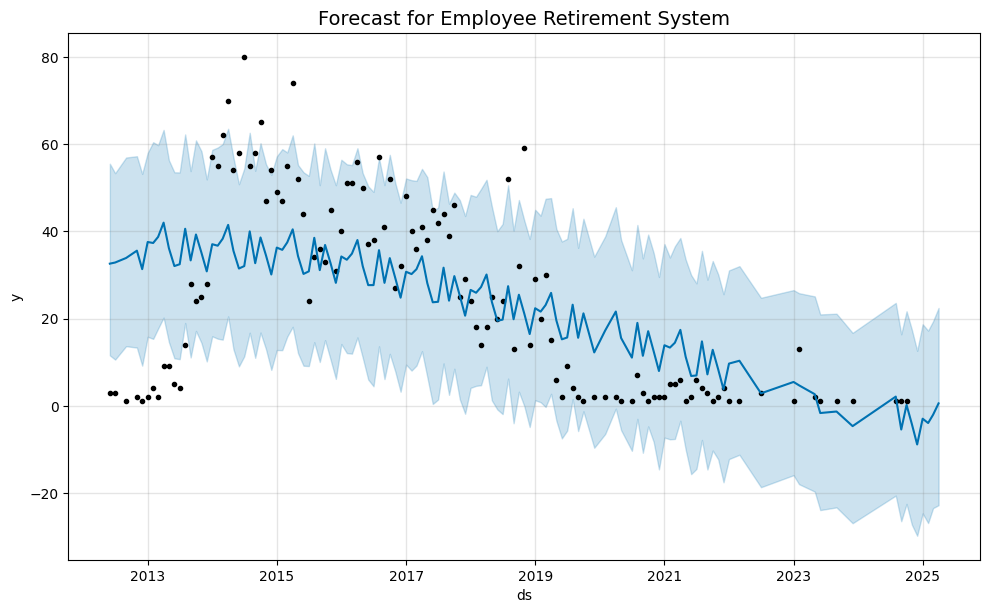

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbljm15bx/m67lbs61.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbljm15bx/1nxjd3hz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52953', 'data', 'file=/tmp/tmpbljm15bx/m67lbs61.json', 'init=/tmp/tmpbljm15bx/1nxjd3hz.json', 'output', 'file=/tmp/tmpbljm15bx/prophet_model_n3yaf0a/prophet_model-20250629185309.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:53:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:53:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages/

Forecast for Medicare HMO


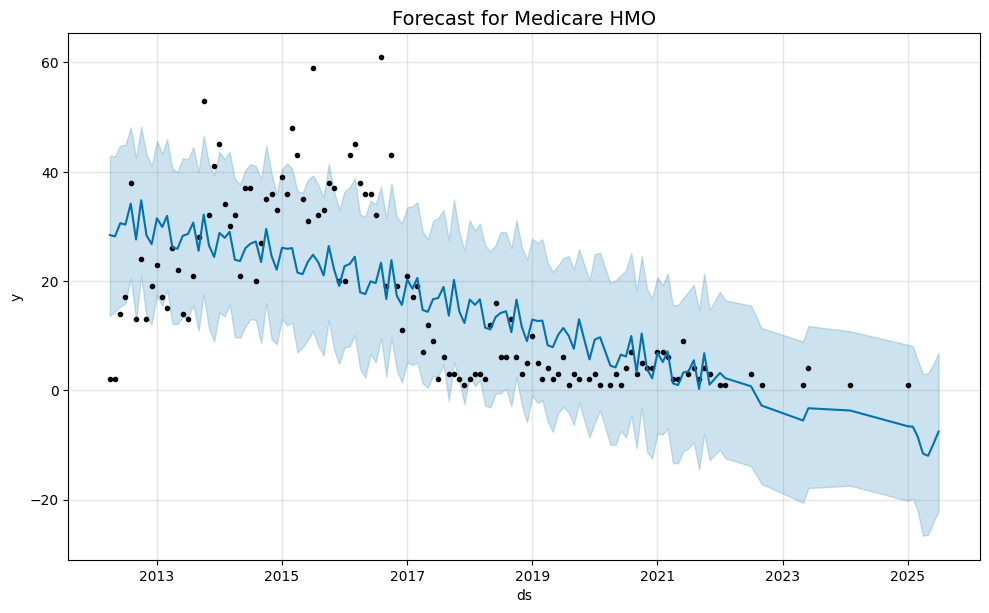

In [60]:
from prophet import Prophet

for ctype in top_types:
    ts = df_top[df_top['Complaint type'] == ctype][['Month', 'count']].rename(columns={'Month': 'ds', 'count': 'y'})
    m = Prophet()
    m.fit(ts)
    future = m.make_future_dataframe(periods=6, freq='M')
    forecast = m.predict(future)

    print(f"Forecast for {ctype}")
    fig = m.plot(forecast)

    # Đặt tiêu đề biểu đồ
    fig.gca().set_title(f"Forecast for {ctype}", fontsize=14)

    plt.show()



Biểu đồ dự báo khiếu nại cho **Medicare HMO**

*1. Xu hướng tổng thể:*

Giảm dần rõ rệt theo thời gian: Đường trung bình (màu xanh đậm) cho thấy số lượng khiếu nại có xu hướng giảm đáng kể qua các tháng.

Đây có thể phản ánh cải thiện trong chất lượng dịch vụ, hoặc thay đổi trong chính sách/phạm vi bảo hiểm khiến số đơn khiếu nại giảm.

*2. Mức độ biến động :*

Vùng bóng màu xanh nhạt là khoảng dự báo tin cậy (confidence interval).

Độ bất định cao ở giai đoạn đầu, sau đó thu hẹp dần – điều này thường xảy ra khi số liệu về sau có xu hướng ổn định hơn hoặc ít biến động.

*3. Dữ liệu thực tế :*

Các chấm đen là dữ liệu gốc (observed values). Một số điểm nằm khá xa vùng dự báo, điều này có thể là do:

Gian lận hoặc sự kiện bất thường.

Đặc thù mùa vụ hoặc chính sách chưa được mô hình hóa.

*4. Dự báo tương lai (6 tháng tiếp theo):*

Prophet dự báo rằng số lượng khiếu nại sẽ tiếp tục giảm hoặc duy trì ở mức rất thấp (khoảng 0–10 đơn).

Giá trị trung bình đang tiến về gần 0, gợi ý rằng nếu không có biến cố mới, thì loại khiếu nại này gần như sẽ không còn đáng kể.



***Phát hiện bất thường về thời gian xử lý***

In [61]:
from sklearn.ensemble import IsolationForest

proc_time = df['processing_time'].dropna().values.reshape(-1,1)

clf = IsolationForest(contamination=0.01, random_state=42)
clf.fit(proc_time)

df['anomaly_processing'] = clf.predict(proc_time)
# -1 là bất thường, 1 là bình thường
df.loc[df['anomaly_processing'] == -1, ['Complaint number', 'processing_time']]


,Complaint number,processing_time
3420,3815,572
45959,71053,594
50442,77866,688
75050,114837,985
75551,115606,636
...,...,...
162494,251103,608
162533,251158,567
162624,251297,573
173003,268937,644


Số lượng hồ sơ bất thường: 2652
       Complaint number  processing_time
3420               3815              572
45959             71053              594
50442             77866              688
75050            114837              985
75551            115606              636


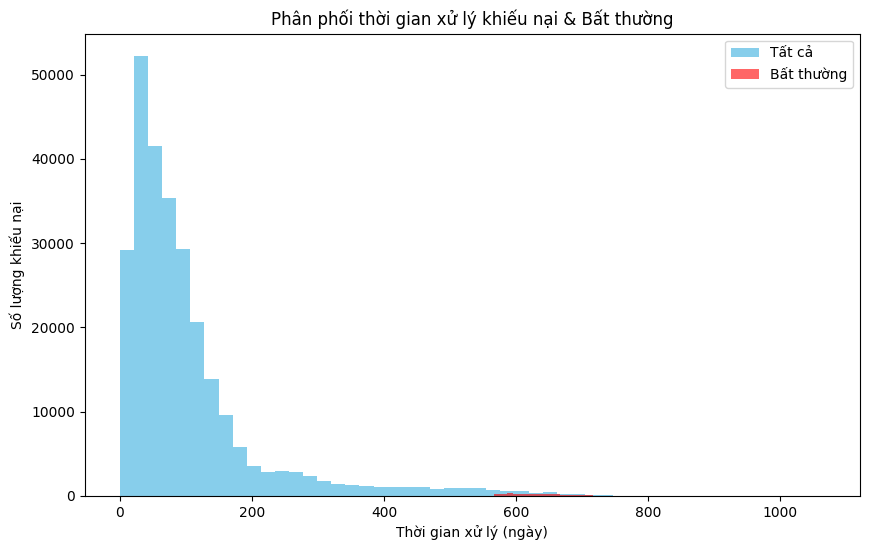

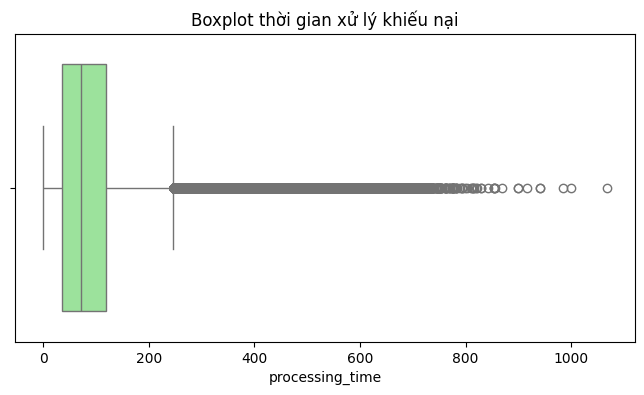

In [62]:
mask = df['processing_time'].notna()
proc_time = df.loc[mask, 'processing_time'].values.reshape(-1, 1)

clf = IsolationForest(contamination=0.01, random_state=42)
clf.fit(proc_time)

df['anomaly_processing'] = 1

df.loc[mask, 'anomaly_processing'] = clf.predict(proc_time)

df_anomaly = df[df['anomaly_processing'] == -1][['Complaint number', 'processing_time']]
print(f"Số lượng hồ sơ bất thường: {len(df_anomaly)}")
print(df_anomaly.head())

plt.figure(figsize=(10, 6))
plt.hist(df['processing_time'], bins=50, color='skyblue', label='Tất cả')
plt.hist(df_anomaly['processing_time'], bins=50, color='red', alpha=0.6, label='Bất thường')
plt.xlabel('Thời gian xử lý (ngày)')
plt.ylabel('Số lượng khiếu nại')
plt.title('Phân phối thời gian xử lý khiếu nại & Bất thường')
plt.legend()
plt.show()

plt.figure(figsize=(8, 4))
sns.boxplot(x='processing_time', data=df, color='lightgreen')
plt.title('Boxplot thời gian xử lý khiếu nại')
plt.show()

Biểu đồ 1: Histogram

Biểu đồ phân phối thời gian xử lý cho thấy phần lớn khiếu nại được giải quyết trong khoảng thời gian hợp lý. Tuy nhiên, một số hồ sơ có thời gian xử lý vượt trội, kéo dài trên 500 ngày, được phát hiện là bất thường bởi mô hình Isolation Forest. Những hồ sơ này chiếm khoảng 1% tổng số nhưng tiềm ẩn rủi ro cao và cần được kiểm tra kỹ lưỡng để xác minh nguyên nhân chậm trễ hoặc khả năng gian lận

 Biểu đồ 2: Boxplot

1. Nhiều điểm rời ở bên phải (high outliers)
→ Cho thấy sự tồn tại của các hồ sơ mất thời gian xử lý rất lâu.

2. Hộp chính rất nhỏ
→ Thời gian xử lý bình thường khá ổn định → bất thường càng nổi bật.

In [63]:
complainant_counts = df['Complaint filed by'].value_counts()
threshold = complainant_counts.quantile(0.99)  # 1% lớn nhất

suspect_complainants = complainant_counts[complainant_counts > threshold]
print("Suspect complainants (many complaints):")
print(suspect_complainants)

Suspect complainants (many complaints):
Complaint filed by
Insured    136336
Name: count, dtype: int64


#4. Phương hướng giải quyết